# Adafruit Blinka and LSM303AGR Accelerometer
<img src="https://cdn-shop.adafruit.com/1200x900/4413-00.jpg" alt="LSM303AGR" height= "500" width="500"/>


In [1]:
# Python Software Package Installation
import sys
!{sys.executable} -m pip install adafruit-circuitpython-lsm303-accel ipympl

**Verify this cell returns acceleration data before proceeding**

In [2]:
# Set an Environment Variable so Adafruit Blinka knows we're using the MCP2221
import os
os.environ["BLINKA_MCP2221"] = "1"

# Import CircuitPython Libraries
import board
import busio
import adafruit_lsm303_accel

i2c = busio.I2C(board.SCL, board.SDA)
accel = adafruit_lsm303_accel.LSM303_Accel(i2c)

print("Acceleration (m/s^2): X=%0.3f Y=%0.3f Z=%0.3f"%accel.acceleration)

Acceleration (m/s^2): X=-3.442 Y=-0.344 Z=8.911


<IPython.core.display.Javascript object>


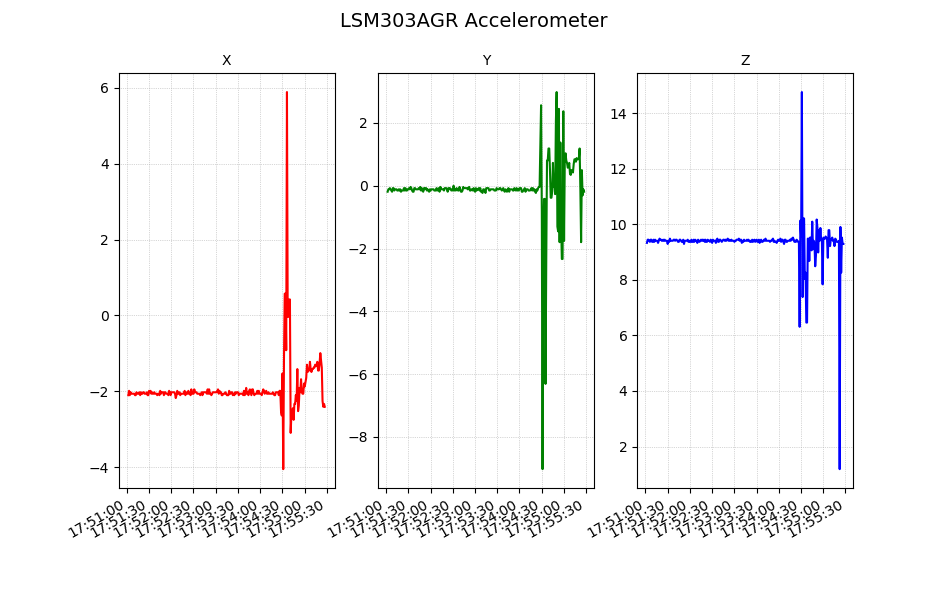

In [27]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import datetime
import matplotlib.dates as mdates
from collections import deque

# How many sensor samples we want to store
HISTORY_SIZE = 500

# Deque for X-Axis (time)
x_vals = deque(maxlen=HISTORY_SIZE)

# Deque for Y-Axis (accelerometer readings)
accel_x = deque(maxlen=HISTORY_SIZE)
accel_y = deque(maxlen=HISTORY_SIZE)
accel_z = deque(maxlen=HISTORY_SIZE)

# Create 3 side-by-side subplots
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

# Global title
fig.suptitle("LSM303AGR Accelerometer", fontsize=14)

def animate(i):
    # Poll the LSM303AGR
    accel_data = accel.acceleration
    # Add the X/Y/Z values to the accel arrays
    accel_x.append(accel_data[0])
    accel_y.append(accel_data[1])
    accel_z.append(accel_data[2])
    
    # Grab the datetime, auto-range based on length of accel_x array
    x_vals = [datetime.datetime.now() + datetime.timedelta(seconds=i) for i in range(len(accel_x))]
    
    # Clear all axis
    ax1.cla()
    ax2.cla()
    ax3.cla()

    # Set grid titles
    ax1.set_title('X', fontsize=10)
    ax2.set_title('Y', fontsize=10)
    ax3.set_title('Z', fontsize=10)
   
    # Enable subplot grid lines
    ax1.grid(True, linewidth=0.5, linestyle=':')
    ax2.grid(True, linewidth=0.5, linestyle=':')   
    ax3.grid(True, linewidth=0.5, linestyle=':')

    # Rotate and align x-axis tick labels so they look better
    fig.autofmt_xdate()

    # Display the sub-plots
    ax1.plot(x_vals, accel_x, color='r')
    ax2.plot(x_vals, accel_y, color='g')
    ax3.plot(x_vals, accel_z, color='b')

# Update graph every 125ms
ani = FuncAnimation(fig, animate, interval=25)